In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.formula.api as smf
from __future__ import division
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/Users/adrianoyoshino/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
starbucks = pd.read_csv('data_2_potential.csv')

In [3]:
starbucks = starbucks.dropna()

In [4]:
starbucks.index = starbucks['BoroCT2010']
starbucks = starbucks.drop(starbucks.columns[[0,2]], axis=1)
starbucks.head()

,BoroCT2010,Census Tract,Estimated population between 2010-2014.,Estimated number of White people between 2010-2014.,Estimated number of non-White people between 2010-2014.,Estimated number of Black people between 2010-2014.,Estimated number of Asian people between 2010-2014.,Estimated number of Asian Chinese people or people of Chinese descent (except Taiwanese) between 2010-2014.,Estimated number of Asian Filipino people or people of Filipino descent between 2010-2014.,Estimated number of Asian Japanese people or people of Japanese descent between 2010-2014.,...,Estimated number of workers who commuted to work using public transit in 2010-2014.,Estimated number of workers who commuted to work by bicycle in 2010-2014.,Estimated number of workers with a work commute of more than an hour in 2010-2014.,Estimated number of workers with a work commute of less than 15 minutes in 2010-2014.,store,theatre,office,transportation_facility,education,utility_bureau
BoroCT2010,,,,,,,,,,,,,,,,,,,,,
1003200,1003200,3.606100e+10,7802.0,6105.0,1697.0,186.0,1133.0,612.0,86.0,122.0,...,2749.0,523.0,244.0,415.0,0.0,1.0,0.0,0.0,3.0,1.0
1014602,1014602,3.606101e+10,7728.0,6643.0,1085.0,157.0,769.0,219.0,25.0,191.0,...,3942.0,0.0,302.0,283.0,0.0,0.0,0.0,0.0,1.0,0.0
1013500,1013500,3.606101e+10,6053.0,4010.0,2043.0,828.0,762.0,348.0,78.0,0.0,...,1342.0,86.0,209.0,447.0,4.0,8.0,19.0,7.0,2.0,1.0
1016900,1016900,3.606102e+10,7811.0,6583.0,1228.0,429.0,417.0,338.0,0.0,26.0,...,3235.0,86.0,186.0,464.0,1.0,0.0,1.0,0.0,6.0,0.0
1006400,1006400,3.606101e+10,7634.0,6021.0,1613.0,284.0,879.0,352.0,151.0,58.0,...,3023.0,85.0,250.0,611.0,0.0,0.0,9.0,0.0,7.0,0.0


In [5]:
# renaming to Y = # of stores and x# as regressors
col = []
col.append('Y')
for i in range(0, len(starbucks.columns)-1):
    col.append('x%d' %(i))


In [6]:
# Saving the original names of columns before regressors reduction
columns = []
for i in range(0, len(starbucks.columns)):
    columns.append(starbucks.columns[i])

In [7]:
starbucks.columns = col

In [8]:
columns

['BoroCT2010',
 'Census Tract',
 'Estimated population between 2010-2014.',
 'Estimated number of White people between 2010-2014.',
 'Estimated number of non-White people between 2010-2014.',
 'Estimated number of Black people between 2010-2014.',
 'Estimated number of Asian people between 2010-2014.',
 'Estimated number of Asian Chinese people or people of Chinese descent (except Taiwanese) between 2010-2014.',
 'Estimated number of Asian Filipino people or people of Filipino descent between 2010-2014.',
 'Estimated number of Asian Japanese people or people of Japanese descent between 2010-2014.',
 'Estimated number of Asian Indian people or people of Asian Indian descent between 2010-2014.',
 'Estimated number of Asian Korean people or people of Korean descent between 2010-2014.',
 'Estimated number of Asian Vietnamese people or people of Vietnamese descent between 2010-2014.',
 'Estimated number of Asian Cambodian people or people of Cambodian descent between 2010-2014.',
 'Estimate

In [9]:
starbucks.head()

,Y,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158
BoroCT2010,,,,,,,,,,,,,,,,,,,,,
1003200,1003200,3.606100e+10,7802.0,6105.0,1697.0,186.0,1133.0,612.0,86.0,122.0,...,2749.0,523.0,244.0,415.0,0.0,1.0,0.0,0.0,3.0,1.0
1014602,1014602,3.606101e+10,7728.0,6643.0,1085.0,157.0,769.0,219.0,25.0,191.0,...,3942.0,0.0,302.0,283.0,0.0,0.0,0.0,0.0,1.0,0.0
1013500,1013500,3.606101e+10,6053.0,4010.0,2043.0,828.0,762.0,348.0,78.0,0.0,...,1342.0,86.0,209.0,447.0,4.0,8.0,19.0,7.0,2.0,1.0
1016900,1016900,3.606102e+10,7811.0,6583.0,1228.0,429.0,417.0,338.0,0.0,26.0,...,3235.0,86.0,186.0,464.0,1.0,0.0,1.0,0.0,6.0,0.0
1006400,1006400,3.606101e+10,7634.0,6021.0,1613.0,284.0,879.0,352.0,151.0,58.0,...,3023.0,85.0,250.0,611.0,0.0,0.0,9.0,0.0,7.0,0.0


In [169]:
X_train = pd.read_csv('X_2_train_selected.csv')
y_train = pd.read_csv('y_2_train_selected.csv')

In [170]:
X_train = X_train.drop(X_train.columns[[0]], axis = 1)
y_train = y_train.drop(y_train.columns[[0]], axis = 1)

In [175]:
X_train.head(2)

,"Number of jobs in Professional, Scientific, and Technical Services in 2014.","Number of workers, by employment location, who are age 29 or younger in 2014.","Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.","Number of workers, by employment location, who are White in 2014.",Number of jobs in Management of Companies and Enterprises in 2014.,Number of jobs in Finance and Insurance in 2014.,"Number of workers, by employment location, with at least a Bachelor's degree in 2014.",Number of jobs in Accommodation and Food Services in 2014.,"Number of jobs in Real Estate, Rental and Leasing in 2014.","Number of workers, by employment location, who are age 55 or older in 2014.","Number of workers, by employment location, who are male in 2014.",Number of jobs in Retail Trade in 2014.,"Number of workers, by employment location, who are Black in 2014.",Number of jobs in Information in 2014.,"Number of workers, by employment location, who earn more than $40,000 annually from their primary job in 2014.",Number of jobs in Public Administration in 2014.,Number of jobs in Wholesale Trade in 2014.,Estimated number of single family attached homes between 2010-2014.,"Number of workers, by employment location, who are Asian in 2014."
0,2320.0,2963.0,1516.0,6946.0,641.0,197.0,2933.0,1840.0,458.0,1662.0,5253.0,274.0,1717.0,1908.0,5995.0,33.0,84.0,0.0,1133.0
1,387.0,513.0,338.0,1183.0,19.0,2.0,401.0,500.0,106.0,224.0,851.0,281.0,183.0,39.0,745.0,5.0,13.0,83.0,200.0


In [174]:
y_train.head(2)

,Y
0,2
1,1


In [176]:
y_train.columns = ['Y']

In [177]:
X_train['test'] = range(0,len(X_train))
y_train['test'] = range(0,len(y_train))

In [178]:
star = pd.merge(left=y_train, right = X_train, how='inner', left_on= 'test', right_on = 'test')

In [181]:
star = star.drop('test', axis = 1)
star.head()

,Y,"Number of jobs in Professional, Scientific, and Technical Services in 2014.","Number of workers, by employment location, who are age 29 or younger in 2014.","Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.","Number of workers, by employment location, who are White in 2014.",Number of jobs in Management of Companies and Enterprises in 2014.,Number of jobs in Finance and Insurance in 2014.,"Number of workers, by employment location, with at least a Bachelor's degree in 2014.",Number of jobs in Accommodation and Food Services in 2014.,"Number of jobs in Real Estate, Rental and Leasing in 2014.","Number of workers, by employment location, who are age 55 or older in 2014.","Number of workers, by employment location, who are male in 2014.",Number of jobs in Retail Trade in 2014.,"Number of workers, by employment location, who are Black in 2014.",Number of jobs in Information in 2014.,"Number of workers, by employment location, who earn more than $40,000 annually from their primary job in 2014.",Number of jobs in Public Administration in 2014.,Number of jobs in Wholesale Trade in 2014.,Estimated number of single family attached homes between 2010-2014.,"Number of workers, by employment location, who are Asian in 2014."
0,2,2320.0,2963.0,1516.0,6946.0,641.0,197.0,2933.0,1840.0,458.0,1662.0,5253.0,274.0,1717.0,1908.0,5995.0,33.0,84.0,0.0,1133.0
1,1,387.0,513.0,338.0,1183.0,19.0,2.0,401.0,500.0,106.0,224.0,851.0,281.0,183.0,39.0,745.0,5.0,13.0,83.0,200.0
2,3,6912.0,9450.0,3977.0,32041.0,530.0,8576.0,17639.0,3504.0,1648.0,8677.0,24306.0,3193.0,5127.0,4889.0,31879.0,144.0,6895.0,0.0,6611.0
3,2,2672.0,2136.0,1148.0,7247.0,18.0,1606.0,3822.0,2116.0,525.0,1871.0,4952.0,376.0,1314.0,1148.0,6587.0,30.0,333.0,16.0,1206.0
4,4,9957.0,7676.0,1926.0,25136.0,538.0,11688.0,15177.0,4733.0,1534.0,5942.0,19042.0,693.0,4508.0,1197.0,29067.0,123.0,601.0,0.0,4727.0


In [182]:
# renaming to Y = # of stores and x# as regressors
col = []
col.append('Y')
for i in range(0, len(star.columns)-1):
    col.append('x%d' %(i))


In [183]:
# Saving the original names of columns before regressors reduction
columns = []
for i in range(0, len(star.columns)):
    columns.append(star.columns[i])

In [185]:
columns

['Y',
 'Number of jobs in Professional, Scientific, and Technical Services in 2014.',
 'Number of workers, by employment location, who are age 29 or younger in 2014.',
 'Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.',
 'Number of workers, by employment location, who are White in 2014.',
 'Number of jobs in Management of Companies and Enterprises in 2014.',
 'Number of jobs in Finance and Insurance in 2014.',
 "Number of workers, by employment location, with at least a Bachelor's degree in 2014.",
 'Number of jobs in Accommodation and Food Services in 2014.',
 'Number of jobs in Real Estate, Rental and Leasing in 2014.',
 'Number of workers, by employment location, who are age 55 or older in 2014.',
 'Number of workers, by employment location, who are male in 2014.',
 'Number of jobs in Retail Trade in 2014.',
 'Number of workers, by employment location, who are Black in 2014.',
 'Number of jobs in Information in 2014.',
 'N

In [186]:
star.columns = col

In [199]:
star.shape

(194, 20)

In [201]:
star.head()

,Y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,2,2320.0,2963.0,1516.0,6946.0,641.0,197.0,2933.0,1840.0,458.0,1662.0,5253.0,274.0,1717.0,1908.0,5995.0,33.0,84.0,0.0,1133.0
1,1,387.0,513.0,338.0,1183.0,19.0,2.0,401.0,500.0,106.0,224.0,851.0,281.0,183.0,39.0,745.0,5.0,13.0,83.0,200.0
2,3,6912.0,9450.0,3977.0,32041.0,530.0,8576.0,17639.0,3504.0,1648.0,8677.0,24306.0,3193.0,5127.0,4889.0,31879.0,144.0,6895.0,0.0,6611.0
3,2,2672.0,2136.0,1148.0,7247.0,18.0,1606.0,3822.0,2116.0,525.0,1871.0,4952.0,376.0,1314.0,1148.0,6587.0,30.0,333.0,16.0,1206.0
4,4,9957.0,7676.0,1926.0,25136.0,538.0,11688.0,15177.0,4733.0,1534.0,5942.0,19042.0,693.0,4508.0,1197.0,29067.0,123.0,601.0,0.0,4727.0


In [188]:
result = smf.ols(formula = 'Y ~ '+ '+'.join(star.columns[1:]), data = star).fit()
print('In sample R-squared: %f'%result.rsquared)
#print('Out of sample R-squared: %f'%modelEval(result))
print('Fitted coefficients:')
print(result.params)

In sample R-squared: 0.737905
Fitted coefficients:
Intercept    0.869815
x0           0.000162
x1          -0.000053
x2           0.000814
x3          -0.000152
x4           0.000147
x5           0.000119
x6          -0.000220
x7          -0.000095
x8           0.000022
x9           0.000808
x10         -0.000133
x11          0.000132
x12         -0.000548
x13          0.000160
x14          0.000267
x15          0.000002
x16         -0.000279
x17          0.000524
x18         -0.000367
dtype: float64


In [205]:
X_test = pd.read_csv('data_2_potential.csv').iloc[:,4:]

In [189]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

In [197]:
X_train = star.ix[:,1:]
y_train = star.ix[:,0]

In [208]:
X_train_cut = X_train.copy()

In [214]:
cut = pd.read_csv('X_2_train_selected.csv')
cut = cut.drop(cut.columns[[0]], axis = 1)
X_test = X_test[list(cut.columns)]

In [215]:
X_test.head(3)

,"Number of jobs in Professional, Scientific, and Technical Services in 2014.","Number of workers, by employment location, who are age 29 or younger in 2014.","Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.","Number of workers, by employment location, who are White in 2014.",Number of jobs in Management of Companies and Enterprises in 2014.,Number of jobs in Finance and Insurance in 2014.,"Number of workers, by employment location, with at least a Bachelor's degree in 2014.",Number of jobs in Accommodation and Food Services in 2014.,"Number of jobs in Real Estate, Rental and Leasing in 2014.","Number of workers, by employment location, who are age 55 or older in 2014.","Number of workers, by employment location, who are male in 2014.",Number of jobs in Retail Trade in 2014.,"Number of workers, by employment location, who are Black in 2014.",Number of jobs in Information in 2014.,"Number of workers, by employment location, who earn more than $40,000 annually from their primary job in 2014.",Number of jobs in Public Administration in 2014.,Number of jobs in Wholesale Trade in 2014.,Estimated number of single family attached homes between 2010-2014.,"Number of workers, by employment location, who are Asian in 2014."
0,70.0,505.0,497.0,1106.0,1.0,25.0,282.0,985.0,102.0,237.0,861.0,203.0,186.0,34.0,434.0,3.0,7.0,13.0,209.0
1,22.0,382.0,380.0,898.0,2.0,21.0,298.0,384.0,202.0,281.0,731.0,301.0,284.0,42.0,497.0,0.0,14.0,30.0,203.0
2,522.0,1797.0,1065.0,5543.0,927.0,43.0,2825.0,667.0,238.0,1711.0,4564.0,1364.0,1536.0,2362.0,5292.0,22.0,138.0,0.0,631.0


In [247]:
Ridge=linear_model.Ridge(fit_intercept=True, alpha=1) #try Ridge with an arbitrary regularization parameter lambda=1

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
#err_OS=p_OS-y_test
#R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
#print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))
Ridge_coef

The R-squared we found for IS Ridge is: 0.7379048169426443


array([  1.62362456e-04,  -5.32611378e-05,   8.13915638e-04,
        -1.52183404e-04,   1.46880737e-04,   1.19091121e-04,
        -2.19717446e-04,  -9.53243171e-05,   2.18033609e-05,
         8.08011476e-04,  -1.33069215e-04,   1.31937224e-04,
        -5.48462278e-04,   1.59567703e-04,   2.67434438e-04,
         1.97158156e-06,  -2.78545946e-04,   5.23762778e-04,
        -3.66523846e-04])

In [246]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=50)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
#err_OS=p_OS-y_test
#R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
#print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))
Lasso_coef

The R-squared we found for IS Lasso is: 0.6903509406319621


array([  1.25287924e-04,  -0.00000000e+00,   2.21696760e-04,
         0.00000000e+00,   2.47504401e-05,   1.19559329e-04,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   1.10938640e-04,
        -0.00000000e+00,   8.81590199e-05,  -1.96055685e-05,
         7.54426992e-06,  -1.35269820e-05,   0.00000000e+00,
         0.00000000e+00])

In [221]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 300)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

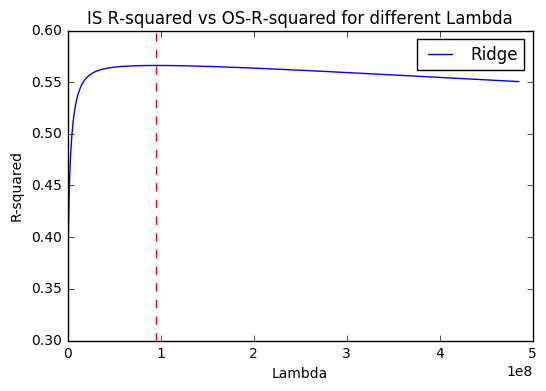

Optimal lambda for Ridge=94757747.92264204


In [222]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,20,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

In [223]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal) #try Ridge with a selected regularization parameter lambda

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
#Out of sample
p_OS=Ridge.predict(X_test)
#err_OS=p_OS-y_test
#R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
#print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))
p_OS

The R-squared we found for IS Ridge is: 0.6903509406319621


array([ 1.0979975 ,  1.0836637 ,  1.64800671,  1.10463608,  1.26759634,
        1.61735671,  1.1061237 ,  1.67469722,  1.18836324,  1.89400284,
        1.90531131,  1.62930301,  1.0513881 ,  1.95044267,  1.21750558,
        1.04119906,  1.19914689,  1.21865257,  3.08980752,  1.49001299,
        1.88518921,  1.21865506,  1.02827897,  2.89449293,  1.89861705,
        1.08388463,  1.05815026,  1.20412053])

/Users/adrianoyoshino/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


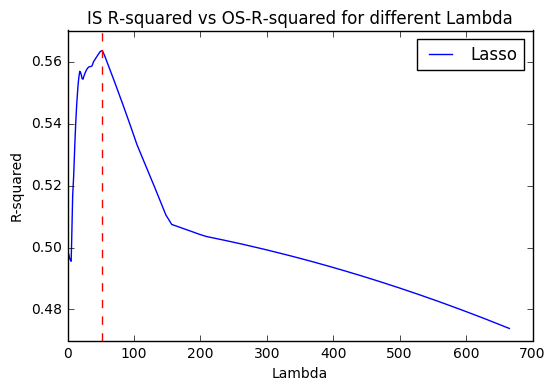

Optimal lambda for Lasso=52.3151723953576


In [224]:
#select lambdas for Lasso 
lambdas=np.exp(np.linspace(-5,6.5,200))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

In [241]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS_lasso=Lasso.predict(X_test)
#err_OS=p_OS-y_test
#R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
#print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))
p_OS_lasso

The R-squared we found for IS Lasso is: 0.6903509406319621


array([ 1.10865701,  1.08692235,  1.54420209,  1.09260648,  1.23124059,
        1.58153862,  1.10525372,  1.67542198,  1.14473299,  1.95539115,
        1.87160302,  1.550379  ,  1.05129558,  1.96710306,  1.22984596,
        1.04271838,  1.15969987,  1.20505663,  3.12296802,  1.50395664,
        1.87527681,  1.20135897,  1.02791666,  3.09332642,  1.78418717,
        1.08299763,  1.07168982,  1.17363274])

In [226]:
columns

['Y',
 'Number of jobs in Professional, Scientific, and Technical Services in 2014.',
 'Number of workers, by employment location, who are age 29 or younger in 2014.',
 'Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.',
 'Number of workers, by employment location, who are White in 2014.',
 'Number of jobs in Management of Companies and Enterprises in 2014.',
 'Number of jobs in Finance and Insurance in 2014.',
 "Number of workers, by employment location, with at least a Bachelor's degree in 2014.",
 'Number of jobs in Accommodation and Food Services in 2014.',
 'Number of jobs in Real Estate, Rental and Leasing in 2014.',
 'Number of workers, by employment location, who are age 55 or older in 2014.',
 'Number of workers, by employment location, who are male in 2014.',
 'Number of jobs in Retail Trade in 2014.',
 'Number of workers, by employment location, who are Black in 2014.',
 'Number of jobs in Information in 2014.',
 'N

In [229]:
imp = columns[1:]

In [277]:
imp

['Number of jobs in Professional, Scientific, and Technical Services in 2014.',
 'Number of workers, by employment location, who are age 29 or younger in 2014.',
 'Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.',
 'Number of workers, by employment location, who are White in 2014.',
 'Number of jobs in Management of Companies and Enterprises in 2014.',
 'Number of jobs in Finance and Insurance in 2014.',
 "Number of workers, by employment location, with at least a Bachelor's degree in 2014.",
 'Number of jobs in Accommodation and Food Services in 2014.',
 'Number of jobs in Real Estate, Rental and Leasing in 2014.',
 'Number of workers, by employment location, who are age 55 or older in 2014.',
 'Number of workers, by employment location, who are male in 2014.',
 'Number of jobs in Retail Trade in 2014.',
 'Number of workers, by employment location, who are Black in 2014.',
 'Number of jobs in Information in 2014.',
 'Number 

In [237]:
importance = pd.DataFrame()

In [239]:
importance['Regressors'] = imp

In [243]:
len(p_OS_lasso)

28

In [244]:
len(imp)

19

In [261]:
importance['Lasso'] = Lasso_coef 
importance['Ridge'] = Ridge_coef 
importance['index'] = range(0, len(importance))

In [262]:
importance

,Regressors,Lasso,Ridge,index
0,"Number of jobs in Professional, Scientific, an...",0.000125,0.000162,0
1,"Number of workers, by employment location, who...",-0.000000,-0.000053,1
2,"Number of workers, by employment location, who...",0.000222,0.000814,2
3,"Number of workers, by employment location, who...",0.000000,-0.000152,3
4,Number of jobs in Management of Companies and ...,0.000025,0.000147,4
5,Number of jobs in Finance and Insurance in 2014.,0.000120,0.000119,5
6,"Number of workers, by employment location, wit...",-0.000000,-0.000220,6
7,Number of jobs in Accommodation and Food Servi...,-0.000000,-0.000095,7
8,"Number of jobs in Real Estate, Rental and Leas...",0.000000,0.000022,8
9,"Number of workers, by employment location, who...",0.000000,0.000808,9


In [263]:
importance.sort_values('Lasso', ascending=False)

,Regressors,Lasso,Ridge,index
2,"Number of workers, by employment location, who...",0.000222,0.000814,2
0,"Number of jobs in Professional, Scientific, an...",0.000125,0.000162,0
5,Number of jobs in Finance and Insurance in 2014.,0.000120,0.000119,5
11,Number of jobs in Retail Trade in 2014.,0.000111,0.000132,11
13,Number of jobs in Information in 2014.,0.000088,0.000160,13
4,Number of jobs in Management of Companies and ...,0.000025,0.000147,4
15,Number of jobs in Public Administration in 2014.,0.000008,0.000002,15
10,"Number of workers, by employment location, who...",-0.000000,-0.000133,10
17,Estimated number of single family attached hom...,0.000000,0.000524,17
12,"Number of workers, by employment location, who...",-0.000000,-0.000548,12


In [264]:
importance.sort_values('Ridge', ascending=False)

,Regressors,Lasso,Ridge,index
2,"Number of workers, by employment location, who...",0.000222,0.000814,2
9,"Number of workers, by employment location, who...",0.000000,0.000808,9
17,Estimated number of single family attached hom...,0.000000,0.000524,17
14,"Number of workers, by employment location, who...",-0.000020,0.000267,14
0,"Number of jobs in Professional, Scientific, an...",0.000125,0.000162,0
13,Number of jobs in Information in 2014.,0.000088,0.000160,13
4,Number of jobs in Management of Companies and ...,0.000025,0.000147,4
11,Number of jobs in Retail Trade in 2014.,0.000111,0.000132,11
5,Number of jobs in Finance and Insurance in 2014.,0.000120,0.000119,5
8,"Number of jobs in Real Estate, Rental and Leas...",0.000000,0.000022,8


In [267]:
importance.sort_values('Ridge', ascending=False)['index'][:5]

2      2
9      9
17    17
14    14
0      0
Name: index, dtype: int64

In [284]:
n = 5 #number of item on ranking
rid = list(importance.sort_values('Ridge', ascending=False)['index'][:n])
las = list(importance.sort_values('Lasso', ascending=False)['index'][:n])

print('Top 5 regressors according by Ridge:')
for i in range(1, n+1):
    print('%d - %s' %(i, imp[rid[i-1]]))

print('\nTop 5 regressors according by Lasso:')
for i in range(1, n+1):
    print('%d - %s' %(i, imp[las[i-1]]))

Top 5 regressors according by Ridge:
1 - Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.
2 - Number of workers, by employment location, who are age 55 or older in 2014.
3 - Estimated number of single family attached homes between 2010-2014.
4 - Number of workers, by employment location, who earn more than $40,000 annually from their primary job in 2014.
5 - Number of jobs in Professional, Scientific, and Technical Services in 2014.

Top 5 regressors according by Lasso:
1 - Number of workers, by employment location, who earn $15,000 or less annually from their primary job in 2014.
2 - Number of jobs in Professional, Scientific, and Technical Services in 2014.
3 - Number of jobs in Finance and Insurance in 2014.
4 - Number of jobs in Retail Trade in 2014.
5 - Number of jobs in Information in 2014.
